![smart_home](SM.jpg) 

In [1]:
#  ____        _        
# |  _ \  __ _| |_ __ _ 
# | | | |/ _` | __/ _` |
# | |_| | (_| | || (_| |
# |____/ \__,_|\__\__,_|
#
# Data Analysis Project by [Mohammed M Darwish]


## The dataset appears the following columns:

1. **Timestamp**: Date and time.
2. **Node**: Identifier for each node.
3. **Temperature (C)**: Temperature readings.
4. **Humidity (%)**: Humidity readings.
5. **Light Status**: Status of the light (ON/OFF).
6. **Motion Detected**: Binary indicator (0 = No, 1 = Yes).
7. **Power Usage (kWh)**: Power consumption readings.


In [254]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import warnings
warnings.filterwarnings("ignore")
sns.set_palette('Blues')

In [256]:
df=pd.read_csv('iot_project.csv',parse_dates=['Timestamp'])

In [258]:
df.sample(10)

,Timestamp,Node,Temperature (C),Humidity (%),Light Status,Motion Detected,Power Usage (kWh)
7003,2022-04-18 04:00:00,Node_4,16.96,51.31,OFF,0,4.41
2546,2022-03-30 14:00:00,Node_7,20.27,61.94,ON,0,3.69
789,2022-03-23 06:00:00,Node_10,31.34,52.88,ON,0,4.29
5051,2022-04-10 01:00:00,Node_2,33.10,58.31,ON,0,2.49
2434,2022-03-30 03:00:00,Node_5,29.71,45.40,OFF,0,0.61
7426,2022-04-19 22:00:00,Node_7,33.70,43.88,ON,0,0.73
7347,2022-04-19 14:00:00,Node_8,33.87,64.70,OFF,0,1.88
7018,2022-04-18 05:00:00,Node_9,30.96,44.47,OFF,1,1.92
1602,2022-03-26 16:00:00,Node_3,28.95,49.72,OFF,0,4.85
2470,2022-03-30 07:00:00,Node_1,30.53,65.93,OFF,0,0.47


In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7450 entries, 0 to 7449
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Timestamp          7450 non-null   datetime64[ns]
 1   Node               7450 non-null   object        
 2   Temperature (C)    7450 non-null   float64       
 3   Humidity (%)       7450 non-null   float64       
 4   Light Status       7450 non-null   object        
 5   Motion Detected    7450 non-null   int64         
 6   Power Usage (kWh)  7450 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 407.6+ KB


### Based on the information provided above, it appears that there are no null values, and the data types are acceptable.
### and it shaped like (7450,7)

In [263]:
#cheak for duplicates:
df.duplicated().sum()

0

### The given data set has no duplicates.
#### For cardinatly, check: 

In [266]:
df.nunique()

Timestamp             745
Node                   10
Temperature (C)      1949
Humidity (%)         3353
Light Status            2
Motion Detected         2
Power Usage (kWh)     491
dtype: int64

#### The dataset is well-organized and cleaned. 

In [269]:
df[['Humidity (%)','Temperature (C)','Power Usage (kWh)']].describe()

,Humidity (%),Temperature (C),Power Usage (kWh)
count,7450.00000,7450.000000,7450.000000
mean,50.02571,25.075878,2.550816
std,11.60422,5.816675,1.413521
min,30.00000,15.000000,0.100000
25%,40.00000,20.032500,1.340000
50%,50.00000,25.125000,2.570000
75%,60.30000,30.147500,3.770000
max,70.00000,35.000000,5.000000


In [271]:
round(df['Node'].value_counts(normalize=True),2)

Node
Node_1     0.1
Node_2     0.1
Node_3     0.1
Node_4     0.1
Node_5     0.1
Node_6     0.1
Node_7     0.1
Node_8     0.1
Node_9     0.1
Node_10    0.1
Name: proportion, dtype: float64

**Notice:** Reliability is ensured by the data's even distribution, with each node providing 10%.
##### Let's now extract the date for plotting usage.

In [274]:
df['Month']=df['Timestamp'].dt.month_name()
df['Day']=df['Timestamp'].dt.day

In [276]:
df.head(2)

,Timestamp,Node,Temperature (C),Humidity (%),Light Status,Motion Detected,Power Usage (kWh),Month,Day
0,2022-03-20,Node_1,31.72,32.23,ON,0,2.92,March,20
1,2022-03-20,Node_2,17.09,59.35,ON,0,1.01,March,20


In [278]:
df.groupby('Month')[['Humidity (%)','Temperature (C)','Power Usage (kWh)']].median()

,Humidity (%),Temperature (C),Power Usage (kWh)
Month,,,
April,50.12,25.185,2.55
March,49.73,24.990,2.61


In [280]:
draw_df=df.groupby('Day')[['Temperature (C)', 'Humidity (%)','Power Usage (kWh)']].median().reset_index()

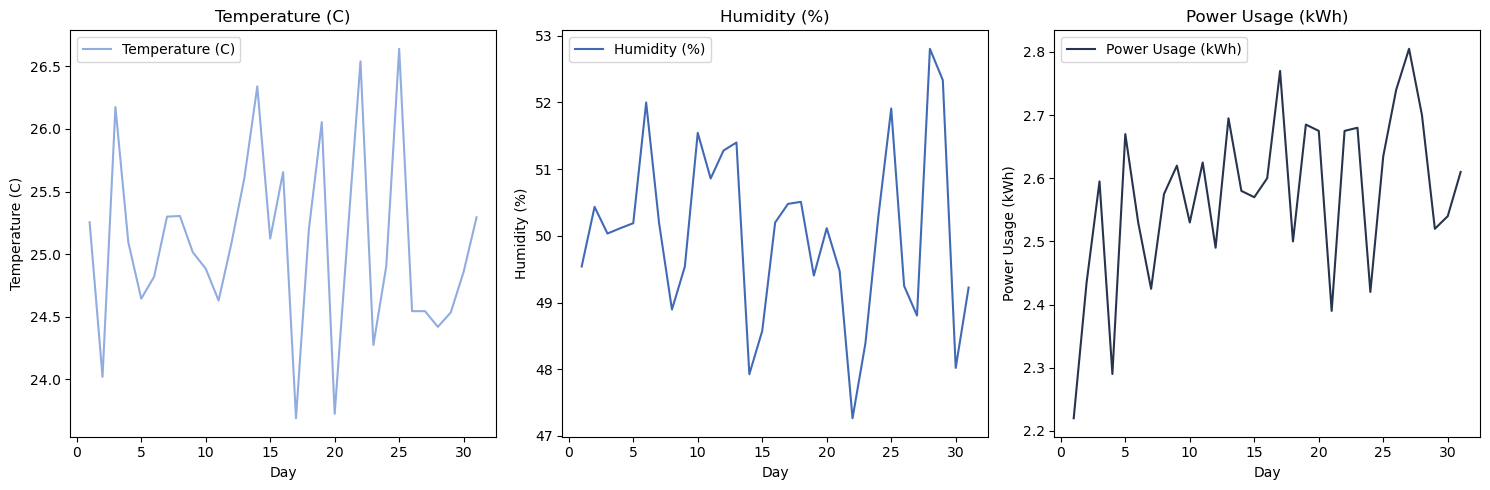

In [282]:
x = draw_df['Day']
fig, axes = plt.subplots(figsize=(15, 5), nrows=1, ncols=3)
# (Temperature (C))
axes[0].plot(x, draw_df['Temperature (C)'], label='Temperature (C)', color='#91acdf')
axes[0].set_title('Temperature (C)')
axes[0].set_xlabel('Day')
axes[0].set_ylabel('Temperature (C)')
axes[0].legend()
# (Humidity (%))
axes[1].plot(x, draw_df['Humidity (%)'], label='Humidity (%)', color='#416ab6')
axes[1].set_title('Humidity (%)')
axes[1].set_xlabel('Day')
axes[1].set_ylabel('Humidity (%)')
axes[1].legend()
# (Power Usage (kWh))
axes[2].plot(x, draw_df['Power Usage (kWh)'], label='Power Usage (kWh)', color='#27344d')
axes[2].set_title('Power Usage (kWh)')
axes[2].set_xlabel('Day')
axes[2].set_ylabel('Power Usage (kWh)')
axes[2].legend()
plt.tight_layout()
plt.show()


In [283]:
df_node=df[['Node','Temperature (C)','Humidity (%)','Power Usage (kWh)']]
nodes=df_node['Node'].unique()
df_node.rename(columns={
    'Temperature (C)':'Temperature',
    'Humidity (%)':'Humidity',
    'Power Usage (kWh)':'Power Usage'
},inplace=True)

In [286]:
df_node['Power Usage']=df_node['Power Usage']*5

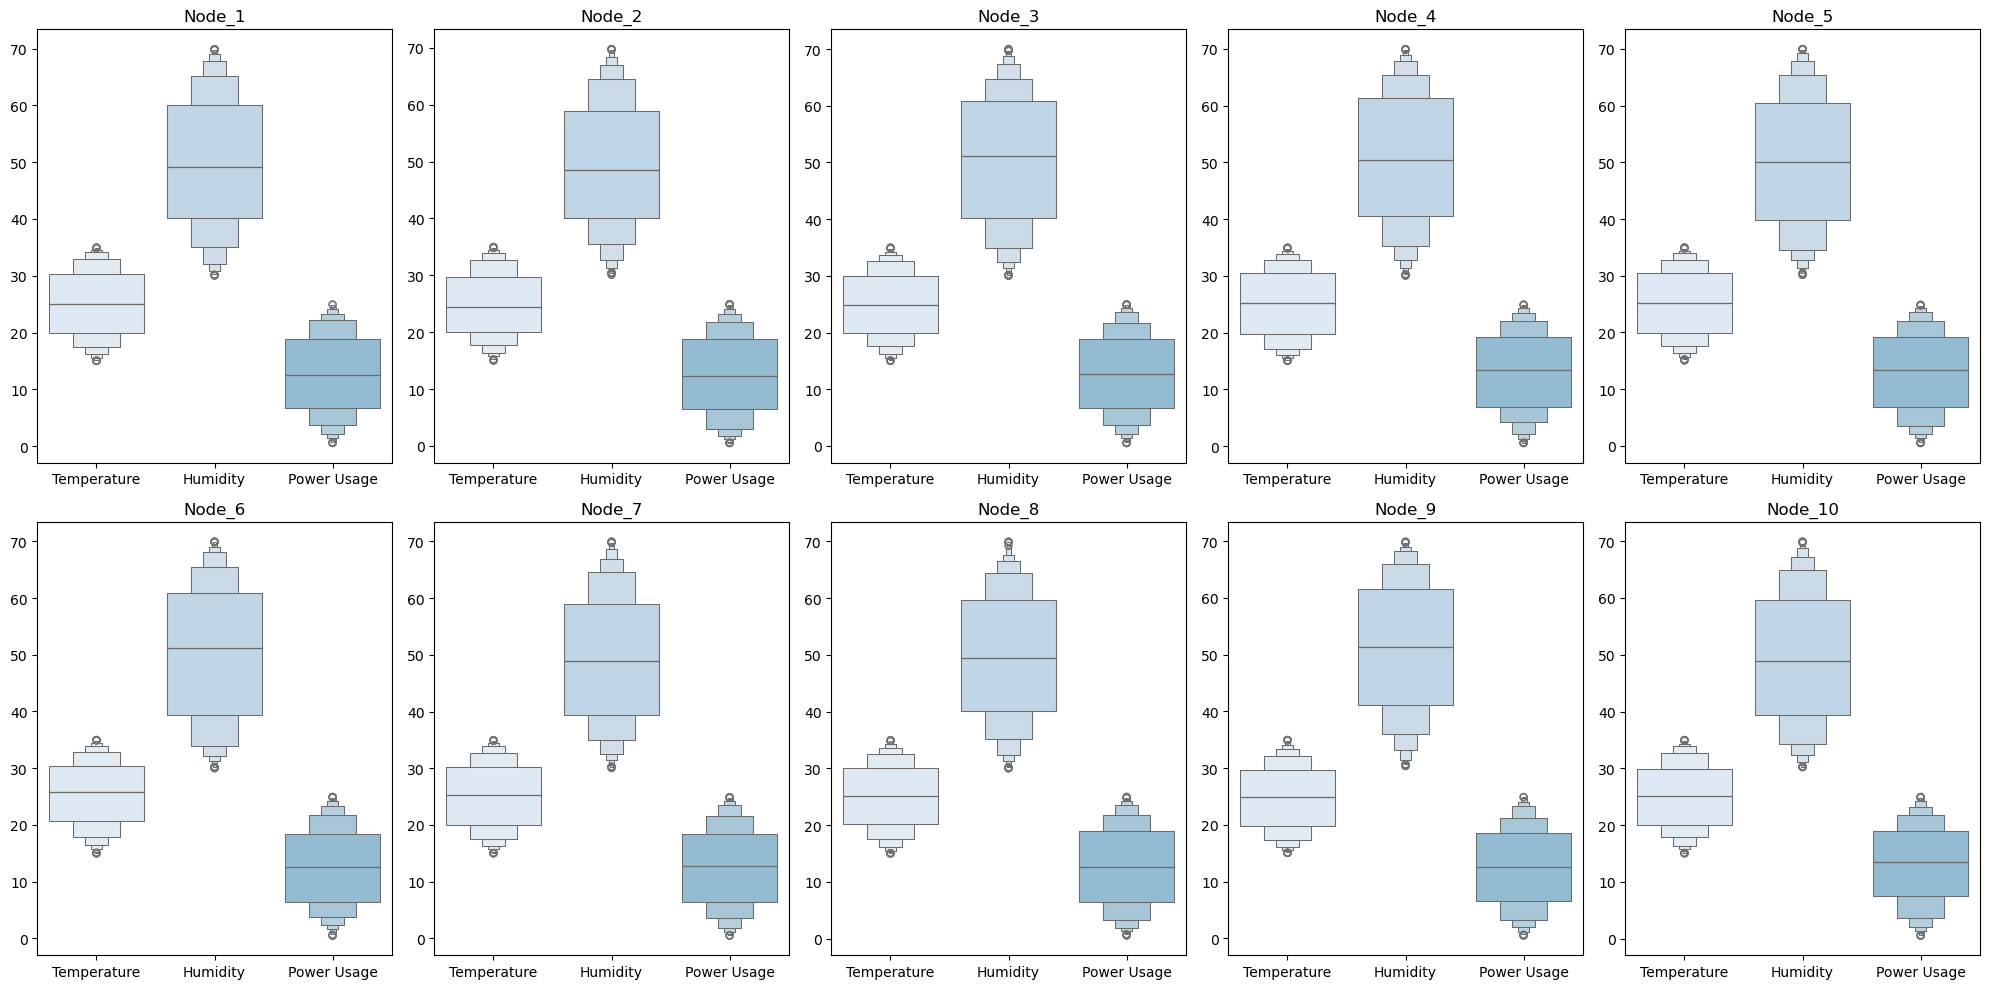

In [288]:

fig, axes = plt.subplots(figsize=(20, 10), nrows=2, ncols=5)
counter = 0
axes = axes.flatten()
for node in nodes:
    df_draw=df_node.query("`Node`==@node")
    if counter<10:
        sns.boxenplot(df_draw,ax=axes[counter])
        axes[counter].set_title(node)   
        counter+=1
plt.tight_layout()
plt.show()


# Take notice that the power usage is multiplied by five.

Text(0.5, 0.98, 'Temperature & Humidity Density')

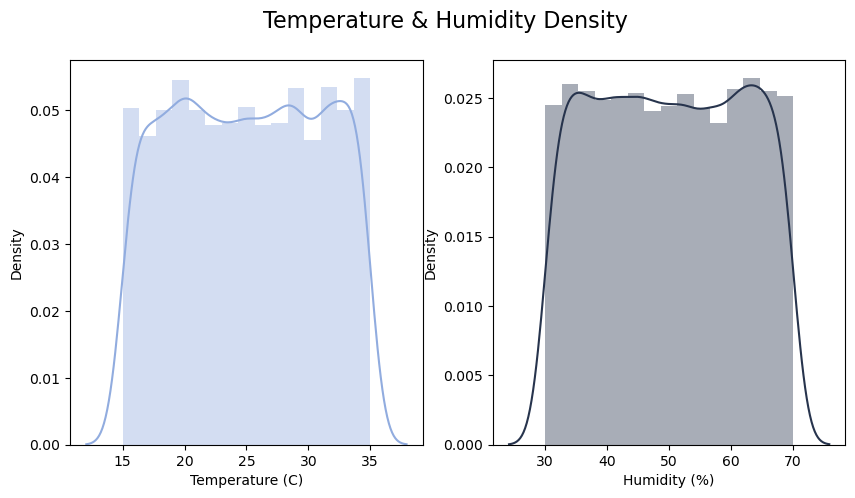

In [290]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(df['Temperature (C)'],bins=15,color='#91acdf')
plt.subplot(1,2,2)
sns.distplot(df['Humidity (%)'],bins=15,color='#27344d')
plt.suptitle('Temperature & Humidity Density', fontsize=16)


In [372]:
power_usage=pd.DataFrame(df.groupby('Node')['Power Usage (kWh)'].median())

In [384]:
print('the values are:',power_usage['Power Usage (kWh)'].values)
print('the index is:',power_usage.index)

the values are: [2.49 2.71 2.45 2.54 2.7  2.68 2.52 2.54 2.52 2.5 ]
the index is: Index(['Node_1', 'Node_10', 'Node_2', 'Node_3', 'Node_4', 'Node_5', 'Node_6',
       'Node_7', 'Node_8', 'Node_9'],
      dtype='object', name='Node')


# power average consumption per node

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Node_1'),
  Text(1, 0, 'Node_2'),
  Text(2, 0, 'Node_3'),
  Text(3, 0, 'Node_4'),
  Text(4, 0, 'Node_5'),
  Text(5, 0, 'Node_6'),
  Text(6, 0, 'Node_7'),
  Text(7, 0, 'Node_8'),
  Text(8, 0, 'Node_9'),
  Text(9, 0, 'Node_10')])

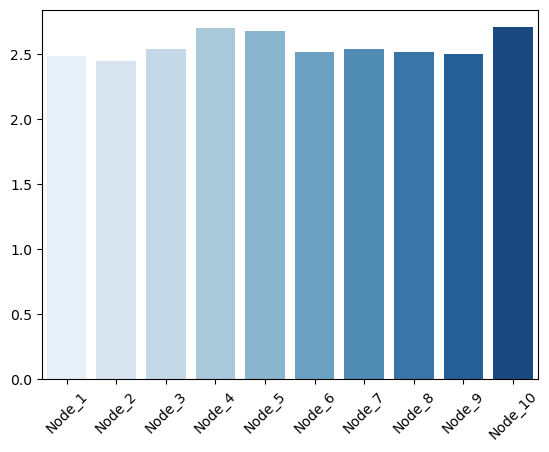

In [386]:
ind=['Node_1' , 'Node_2', 'Node_3', 'Node_4', 'Node_5', 'Node_6',
       'Node_7', 'Node_8', 'Node_9', 'Node_10']
val=[2.49, 2.45, 2.54, 2.7 , 2.68, 2.52, 2.54, 2.52, 2.5 , 2.71]
sns.barplot(x=ind,y=val,palette='Blues')
plt.xticks(rotation=45)

# relationship between Humidity (%) and Temperature (C)

<Axes: xlabel='Temperature (C)', ylabel='Humidity (%)'>

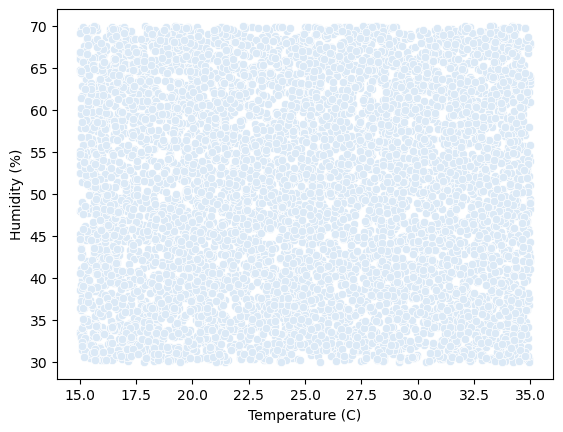

In [390]:
sns.scatterplot(data=df,x='Temperature (C)',y='Humidity (%)')

In [394]:
# Lastly, the connection between lighting and motin 

In [398]:
df['Light Status'].replace({
    'ON':1,
    'OFF':0
},inplace=True)

In [404]:
df[['Light Status','Motion Detected']].corr()

,Light Status,Motion Detected
Light Status,1.000000,-0.010193
Motion Detected,-0.010193,1.000000


# Heatmaps and cluster plots are not necessary because they are not highly connected.